In [15]:
import pandas as pd
import numpy as np
import os

In [16]:
# Load the validated data
user_story_df = pd.read_csv('../artifacts/data/validated.csv')
user_story_df

,text,label
0,As an app developer aiming for low-resource en...,Chat
1,"As a community member, I want to create a Pod/...",Chat
2,As a governmental agency providing Pods for ci...,Authentication
3,"As a existing Solid user, I would like to use ...",Authentication
4,"As a Solid Identity Provider, I would like it ...",Authentication
...,...,...
2130,"As a UMD employee, I want to be able to access...",Unknown
2131,"As a UMD employee, I want the system to start ...",Unknown
2132,"As a UMD employee, I want a platform that can ...",Unknown
2133,"As a UMD employee, I want the software to be a...",Unknown


In [17]:
user_story_df['text_length'] = user_story_df['text'].apply(len)
user_story_df['text'] = user_story_df['text'].apply(str.strip)

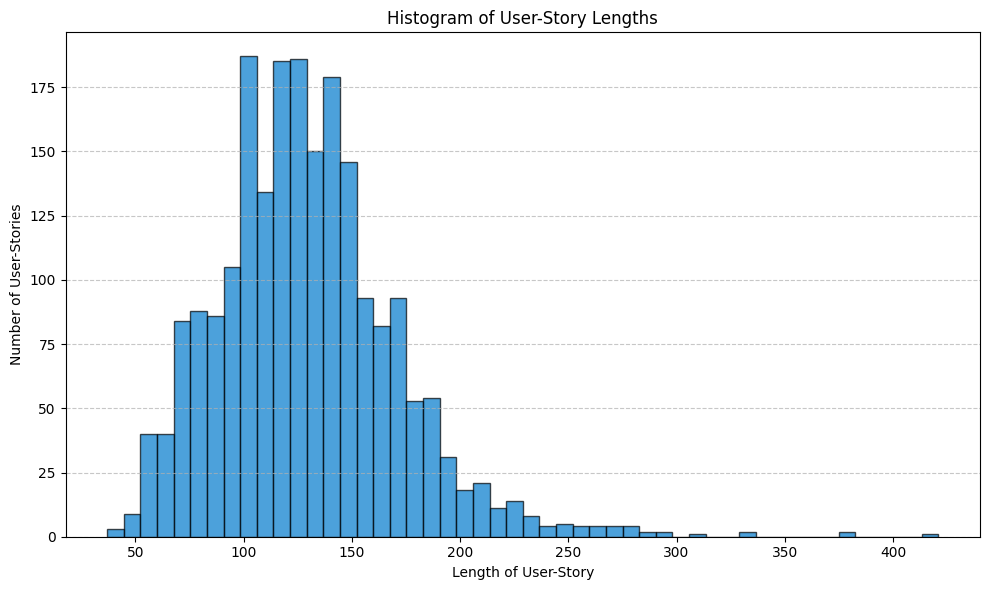

In [18]:
import matplotlib.pyplot as plt

# Set the figure size and resolution
plt.figure(figsize=(10, 6), dpi=100)

# Create the histogram
plt.hist(user_story_df['text_length'], bins=50, color='#007acc', alpha=0.7, edgecolor='black')

# Set the title and labels
plt.title('Histogram of User-Story Lengths')
plt.xlabel('Length of User-Story')
plt.ylabel('Number of User-Stories')

# Display gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Use tight layout
plt.tight_layout()

# Show the plot
plt.show()


In [19]:
Q1 = user_story_df['text_length'].quantile(0.25)
Q3 = user_story_df['text_length'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_filtered = user_story_df[~((user_story_df['text_length'] < (Q1 - 1.5 * IQR)) | (user_story_df['text_length'] > (Q3 + 1.5 * IQR)))]

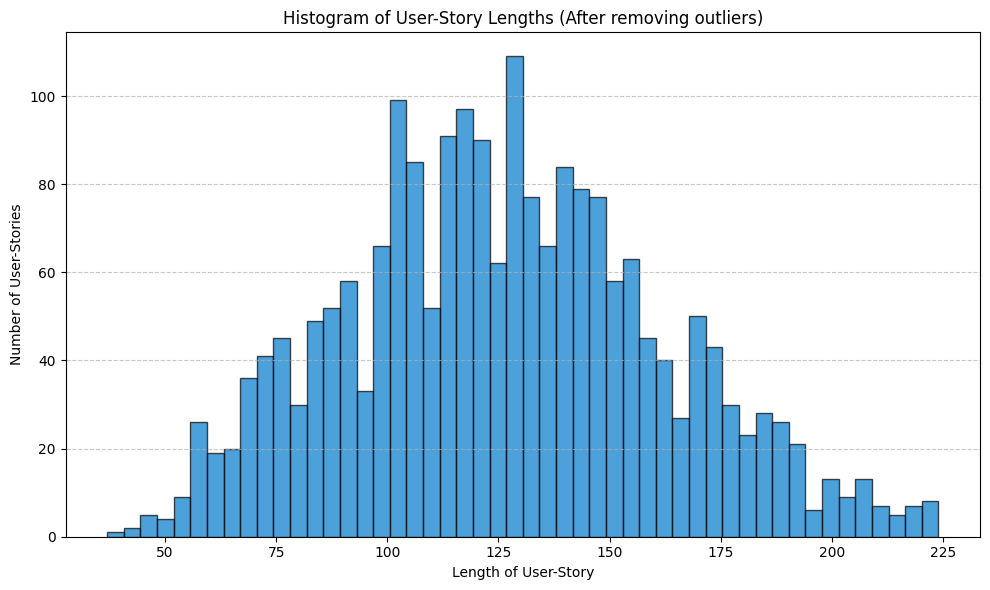

In [20]:
import matplotlib.pyplot as plt

# Set the figure size and resolution
plt.figure(figsize=(10, 6), dpi=100)

# Create the histogram
plt.hist(df_filtered['text_length'], bins=50, color='#007acc', alpha=0.7, edgecolor='black')

# Set the title and labels
plt.title('Histogram of User-Story Lengths (After removing outliers)')
plt.xlabel('Length of User-Story')
plt.ylabel('Number of User-Stories')

# Display gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Use tight layout
plt.tight_layout()

# Show the plot
plt.show()


In [21]:
df_filtered

,text,label,text_length
0,As an app developer aiming for low-resource en...,Chat,103
1,"As a community member, I want to create a Pod/...",Chat,105
3,"As a existing Solid user, I would like to use ...",Authentication,174
4,"As a Solid Identity Provider, I would like it ...",Authentication,142
5,"As a Solid Identity Provider, I would like to ...",Authentication,126
...,...,...,...
2130,"As a UMD employee, I want to be able to access...",Unknown,98
2131,"As a UMD employee, I want the system to start ...",Unknown,118
2132,"As a UMD employee, I want a platform that can ...",Unknown,138
2133,"As a UMD employee, I want the software to be a...",Unknown,122


In [22]:
df_filtered.to_csv('../artifacts/data/preprocessed.csv', index=False)

### **Data splitting for classification of unlabelled data rows**

In [23]:
validated_user_story = df_filtered

df_test = validated_user_story[validated_user_story['label'] != 'Unknown']
df_test

,text,label,text_length
0,As an app developer aiming for low-resource en...,Chat,103
1,"As a community member, I want to create a Pod/...",Chat,105
3,"As a existing Solid user, I would like to use ...",Authentication,174
4,"As a Solid Identity Provider, I would like it ...",Authentication,142
5,"As a Solid Identity Provider, I would like to ...",Authentication,126
...,...,...,...
73,"As a Developer, I want to ensure that our webs...",Accessibility,135
74,"As a Quality Assurance Engineer, I want to tes...",Accessibility,138
75,"As a Project Manager, I want to ensure that ac...",Accessibility,135
76,"As a Developer, I want to implement keyboard n...",Accessibility,134


In [24]:
df_test['label'].value_counts()

label
Chat              18
Contacts          15
Aggregation       11
Accessibility     11
Consistency       11
Authentication    10
Name: count, dtype: int64

In [25]:
df_test.to_csv('../artifacts/data/test.csv', index=False)

In [26]:
df_unlabeled = validated_user_story[validated_user_story['label'] == 'Unknown']
df_unlabeled.sort_values(by='text_length')

,text,label,text_length
1551,"As User, I want to be able to log in.",Unknown,37
1550,"As a User, I want to authenticate locally.",Unknown,42
1539,"As an Archivist, I want to import EAD data.",Unknown,43
2020,"As IFA, I want to monitor the teams’ budgets.",Unknown,45
1503,"As a User , I want to authenticate using LDAP.",Unknown,46
...,...,...,...
921,"As a match official, I want to have my preferr...",Unknown,223
1818,"As a crossdeptprojteammember, I want to have a...",Unknown,224
848,"As a Publisher, I want to publish a data packa...",Unknown,224
854,"As a Publisher, I want to be able to preview t...",Unknown,224


In [27]:
df_unlabeled.to_csv('../artifacts/data/unlabeled.csv', index=False)